# Event-Related Potentials (ERPs)

ERPs are:
1. Time-locked neural responses to specific events/stimuli
2. Measured through EEG as voltage changes over time
3. Usually too small to see in single trials, so we average many trials together

## Main Components of ERP Analysis Pipeline

1. **Preprocessing**:
   * Filtering to remove unwanted frequencies
   * Artifact removal (eye blinks, muscle activity)
   * Reference selection

2. **Epoching**:
   * Cutting continuous data into time-locked segments
   * Usually includes pre-stimulus baseline
   * Rejection of bad epochs

3. **Averaging**:
   * Computing mean across trials for each condition
   * Improves signal-to-noise ratio
   * Reveals consistent neural responses

4. **Analysis**:
   * Component identification (e.g., N100, P300)
   * Statistical comparisons between conditions
   * Topographical analysis


The following code demonstrates each step of the ERP analysis pipeline using the `mne` library.

The demo file is a continuous EEG recording from a single subject performing a visual oddball task. The task consists of two types of stimuli: frequent/standard and targe/deviant/odd. The standard stimuli if a frequent image of a man, while the target/odd stimuli is a less frequent image of a shark:

* code for standard/frequent image appearance is 13.
* code for target/odd/deviant image appearance is 14.

The patient is also asked to press a button whenever the odd image appears to ensure they are paying attention. The code for button press is 7.

In [1]:
print('Ahmed: age is "30"')

Ahmed: age is "30"


# Settings

In [2]:
plotting = False
low_freq_filter = 0.1
high_freq_filter = 40

# Preparation

In [3]:

import mne # EEG/ERP data analysis
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# ERP Analysis with MNE-Python
# ============================
"""
Basic ERP Analysis Pipeline
--------------------------
This guide covers the fundamental steps for ERP analysis using MNE-Python:
1. Loading data
2. Preprocessing
3. Epoching
4. Averaging
5. Visualization
"""

# 1. Loading Data
# --------------
# Load raw data (assuming you have a neuroscan .cnt file)
raw = mne.io.read_raw_cnt('data\\visual p300\\visual_p300_eeg_control_1.cnt', preload=True)

# plot
if plotting:
    raw.plot()

d:\Installed\mambaforge\envs\mne\lib\site-packages\mne\channels\layout.py:812: RuntimeWarning: invalid value encountered in divide
  xs /= sqs  # Shape to a sphere and normalize
d:\Installed\mambaforge\envs\mne\lib\site-packages\mne\channels\layout.py:813: RuntimeWarning: invalid value encountered in divide
  ys /= sqs


Reading 0 ... 166017  =      0.000 ...   332.034 secs...


In [5]:
# display channels
raw.ch_names

['Fp1',
 'Fpz',
 'Fp2',
 'F7',
 'F3',
 'Fz',
 'F4',
 'F8',
 'FC5',
 'FC1',
 'FC2',
 'FC6',
 'M1',
 'T7',
 'C3',
 'Cz',
 'C4',
 'T8',
 'M2',
 'CP5',
 'CP1',
 'CP2',
 'CP6',
 'P7',
 'P3',
 'Pz',
 'P4',
 'P8',
 'POz',
 'O1',
 'O2',
 'EOG',
 'AF7',
 'AF3',
 'AF4',
 'AF8',
 'F5',
 'F1',
 'F2',
 'F6',
 'FC3',
 'FCz',
 'FC4',
 'C5',
 'C1',
 'C2',
 'C6',
 'CP3',
 'CP4',
 'P5',
 'P1',
 'P2',
 'P6',
 'PO5',
 'PO3',
 'PO4',
 'PO6',
 'FT7',
 'FT8',
 'TP7',
 'TP8',
 'PO7',
 'PO8',
 'Oz',
 'BIP1',
 'BIP2',
 'BIP3',
 'BIP4',
 'BIP5',
 'BIP6',
 'BIP7',
 'BIP8',
 'BIP9',
 'BIP10',
 'BIP11',
 'BIP12',
 'BIP13',
 'BIP14',
 'BIP15',
 'BIP16',
 'BIP17',
 'BIP18',
 'BIP19',
 'BIP20',
 'BIP21',
 'BIP22',
 'BIP23',
 'BIP24',
 'BIP24_1']

# Preprocessing

In [6]:
# Rereferencing

# To linked mastoid
raw.set_eeg_reference(ref_channels=['M1', 'M2'])


# To common average
# raw.set_eeg_reference(ref_channels='average')
raw.plot()

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Using qt as 2D backend.


In [7]:

# Drop unused channels
channelsToDrop = ['EOG', 'BIP1', 'BIP2', 'BIP3', 'BIP4', 'BIP5', 'BIP6', 'BIP7', 'BIP8', 'BIP9', 'BIP10', 'BIP11', 'BIP12', 'BIP13', 'BIP14', 'BIP15', 'BIP16', 'BIP17', 'BIP18', 'BIP19', 'BIP20', 'BIP21', 'BIP22', 'BIP23', 'BIP24', 'BIP24_1']

raw.drop_channels(channelsToDrop)

# Zero the bad channels
# raw.info['bads'] = []

if plotting:
    raw.plot()

In [8]:

# Set montage
montage = mne.channels.make_standard_montage('standard_1005') # if it's 32 bit, use 'standard_1020'
raw.set_montage(montage)

# Filter the data
raw.filter(l_freq=low_freq_filter, h_freq=high_freq_filter)  # Band-pass filter 0.1-40 Hz

# Remove power line noise
raw.notch_filter(freqs=50) # electric power line noise in Egypt and Europe is 50 Hz (60 Hz in the US)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 16501 samples (33.002 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 3301 samples (6.602 sec)



[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    2.2s finished


<RawCNT | visual_p300_eeg_control_1.cnt, 63 x 166018 (332.0 s), ~79.9 MB, data loaded>

In [11]:
raw.plot()

Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 15 components
Fitting ICA took 39.6s.


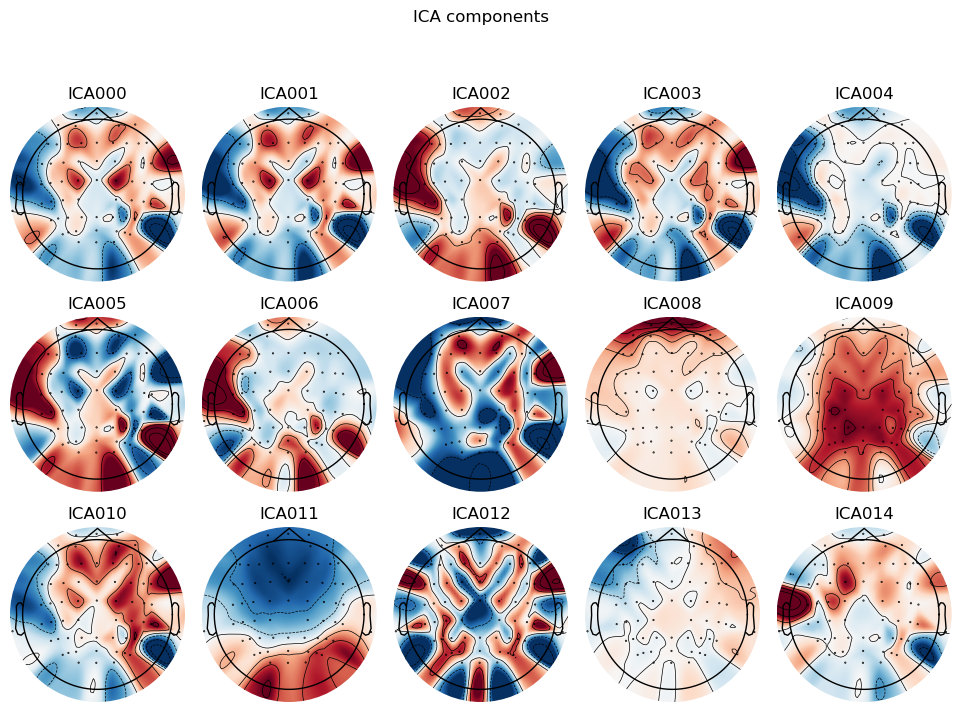

Creating RawArray with float64 data, n_channels=15, n_times=166018
    Range : 0 ... 166017 =      0.000 ...   332.034 secs
Ready.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
166 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
166 matching events found
No baseline correction applied
0 projection items activated


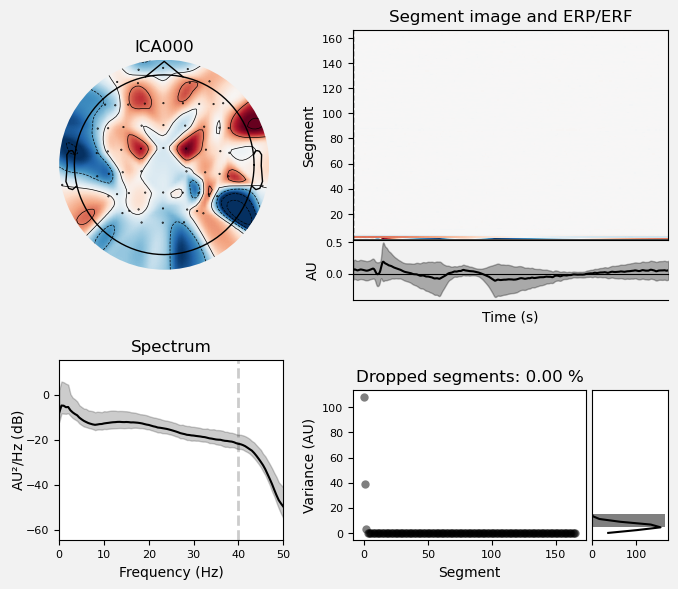

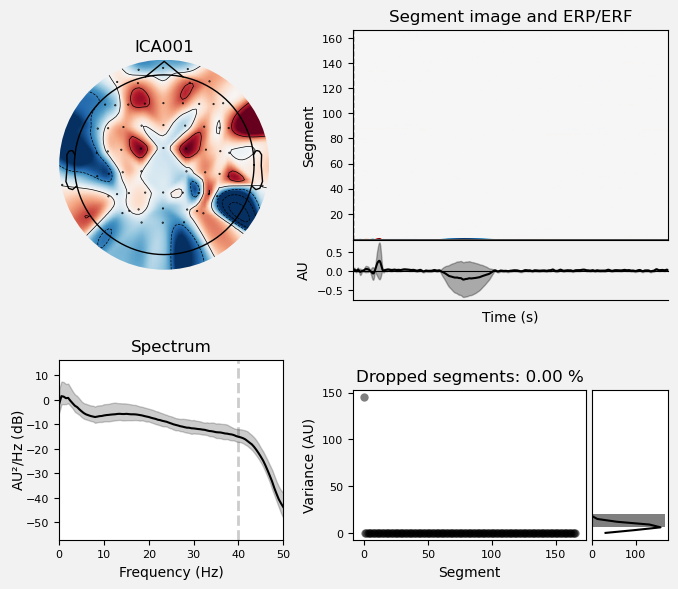

[<Figure size 700x600 with 6 Axes>, <Figure size 700x600 with 6 Axes>]

In [ ]:
raw.info['bads'] = []

# Optional: ICA for artifact correction
ica = mne.preprocessing.ICA(n_components=15, random_state=97)
ica.fit(raw)

# Plot both waves and topographies
ica.plot_components()
ica.plot_sources(raw)




    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
166 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
166 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
166 matching events found
No baseline correction applied
0 projection items activated


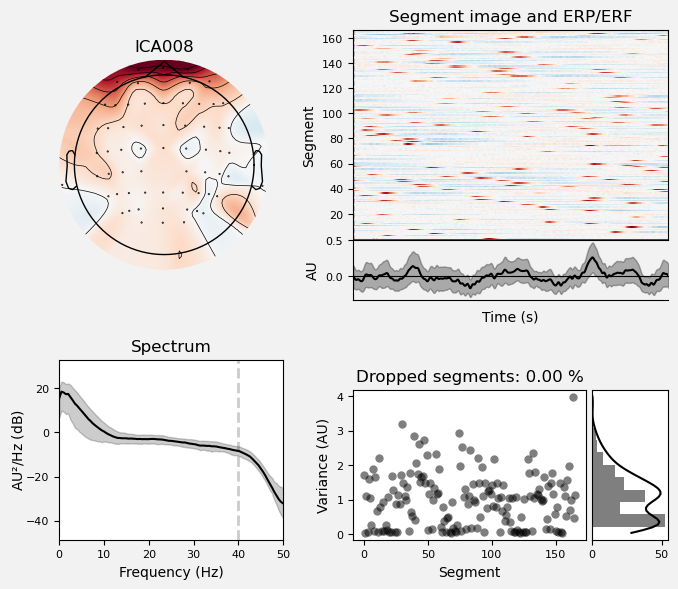

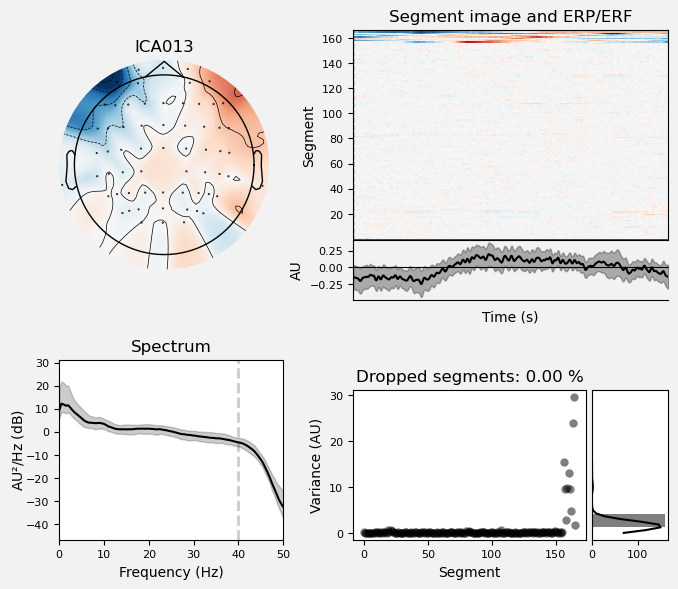

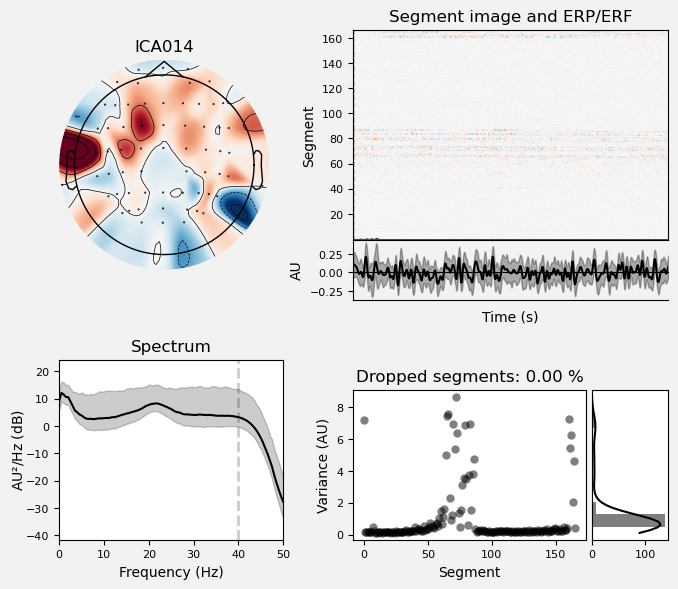

[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

In [12]:

ica.plot_properties(raw, picks=[8, 13, 14])

In [13]:
# # Determine which components to exclude
ica.exclude = [8, 13, 14]  # Exclude components manually after visual inspection

# Apply ICA to raw data: this step will remove the components that are considered artifacts and then reconstruct the raw EEG data without these components.
ica.apply(raw)

if plotting:
  raw.plot()

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 3 ICA components
    Projecting back using 63 PCA components


In [14]:
raw.plot()

In [102]:
raw.info['bads'] = []

In [15]:

# 3. Epoching
# -----------
# Define event dictionary (modify based on your trigger codes)
# event_dict = {'standard': 13, 'target': 14}
event_dict = {'13': 13, '14': 14}

# Find events in the data
events = mne.events_from_annotations(raw, event_id=event_dict)[0]

# Create epochs
epochs = mne.Epochs(raw, events, event_id=event_dict, 
                   tmin=-0.200, tmax=0.600,  # Time window around trigger
                   baseline=(-0.2, 0),    # Baseline correction period
                   preload=True)

# # plot the epoched EEG
# # if you leave n_channels empty, it will plot all channels, and if you leave n_epochs empty, it will plot all epochs. It's just for visualization purposes.
# # if you want to see the events, you can add the events parameter and set it to the events array from above.
if plotting:
    epochs.plot(events=events)


Used Annotations descriptions: ['13', '14']
Not setting metadata
160 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 160 events and 401 original time points ...
0 bad epochs dropped


    Rejecting  epoch based on EEG : ['FC6', 'C6']
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['F6']
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['FC6', 'C6']
    Rejecting  epoch based on EEG : ['FC6', 'T8', 'C6']
    Rejecting  epoch based on EEG : ['FC6', 'C6']
    Rejecting  epoch based on EEG : ['F1']
    Rejecting  epoch based on EEG : ['FC6', 'F6', 'FC4', 'C6']
    Rejecting  epoch based on EEG : ['P2']
    Rejecting  epoch based on EEG : ['F6']
    Rejecting  epoch based on EEG : ['F1', 'FC4', 'P6']
    Rejecting  epoch based on EEG : ['F1', 'C2']
    Rejecting  epoch based on EEG : ['Cz', 'F1', 'F6', 'FC3', 'FCz', 'C1', 'FT8']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['FC3']
17 bad epochs dropped


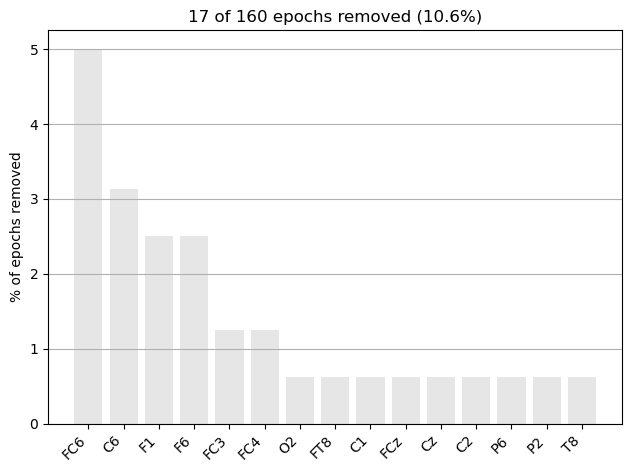

In [16]:

# Artifact Rejection: Reject bad epochs (adjust thresholds as needed)
epochs.drop_bad(reject={'eeg': 100e-6})  # 100 µV threshold

# Plot drop log
epochs.plot_drop_log()

# plot epochs after dropping bad epochs
if plotting:
    epochs.plot(events=events)

# Averaging

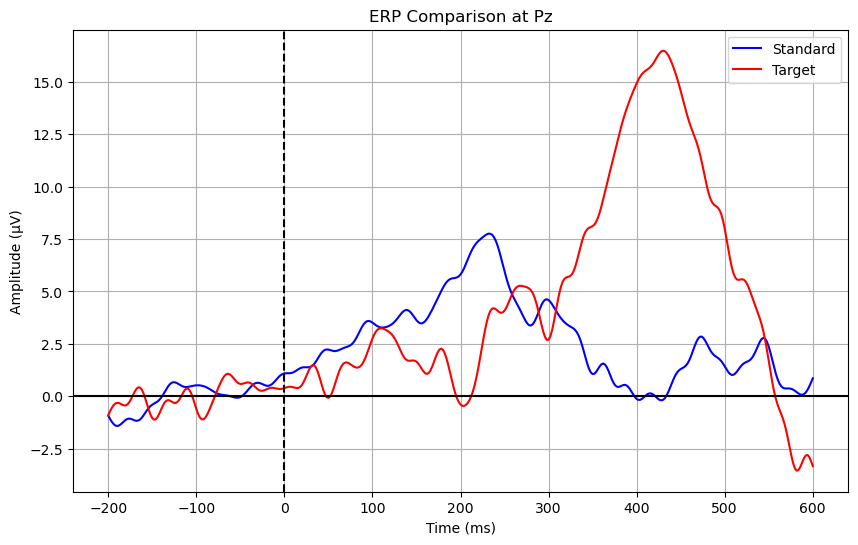

In [17]:

# 4. Computing ERPs
# ----------------
# Calculate average ERP for each condition
erp_standard = epochs['13'].average() # frequent/standard
erp_target = epochs['14'].average() # odd/rare/target

# 5. Visualization
# ---------------
# Plot ERPs
def plot_erp_comparison(erp_std, erp_tgt, channel='Cz'):
    """Plot ERP comparison for a specific channel."""
    times = erp_std.times * 1000  # Convert to milliseconds
    
    plt.figure(figsize=(10, 6))
    plt.plot(times, erp_std.data[erp_std.ch_names.index(channel)] * 1e6, 
             label='Standard', color='blue')
    plt.plot(times, erp_tgt.data[erp_tgt.ch_names.index(channel)] * 1e6, 
             label='Target', color='red')
    
    plt.axvline(x=0, color='k', linestyle='--')
    plt.axhline(y=0, color='k', linestyle='-')
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude (µV)')
    plt.title(f'ERP Comparison at {channel}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot ERP comparison
plot_erp_comparison(erp_standard, erp_target, channel='Pz')



Need more than one channel to make topography for eeg. Disabling interactivity.


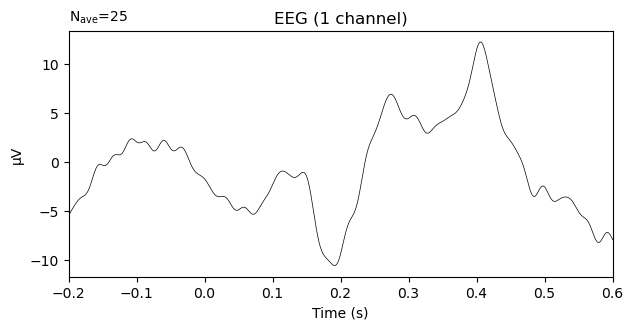

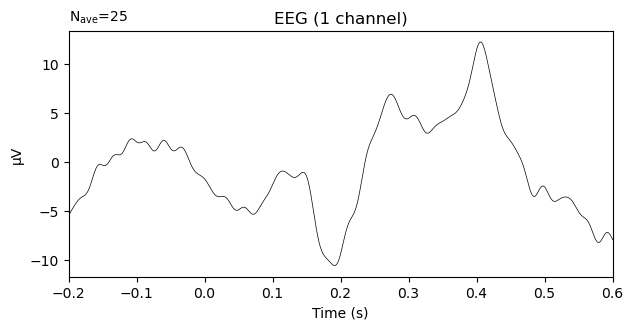

In [ ]:
# erp_target.data # each point in data represents the amplitude of the signal at that time point, starting from the beginning of the epoch (tmin) to the end of the epoch (tmax). The number of points in data is equal to the number of time points in the epoch, which is determined by the sampling frequency and the duration of the epoch.

# if you want to get the amplitude of the 1st time point at Pz:
# erp_target.data[erp_target.ch_names.index('Pz')][2] # 1st time point

# if you want to get tmin, tmax, and times:
# erp_target.times # times represents the time points at which the amplitude was measured, starting from tmin to tmax. If you want to get a specific amplitude at a specific time point, you can use the index of that time point in the times array to get the corresponding amplitude from the data array:
# erp_target.data[erp_target.ch_names.index('Pz')][erp_target.times.tolist().index(0.4)] * 1e6 # we multiplied by 1e6 (1 million) to convert it to microvolts


# What are useful functions in the evoked class other than data, times, tmin, and tmax?
# erp_target.plot() # plot the erp_target response. plots all.
erp_target.plot(picks=['Oz']) # plot the erp_target response at Cz channel
# erp_target.plot_topomap() # plot topography
# erp_target.plot_joint() # plot joint plot. Joint is a combination of topography and time series
# erp_target.plot_sensors() # plot sensors
# erp_target.save() # save the erp_target response



Standard
No projector specified for this dataset. Please consider the method self.add_proj.


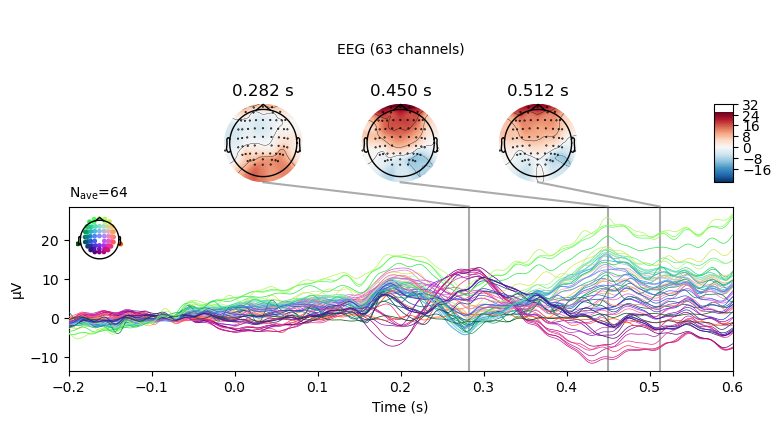

Target
No projector specified for this dataset. Please consider the method self.add_proj.


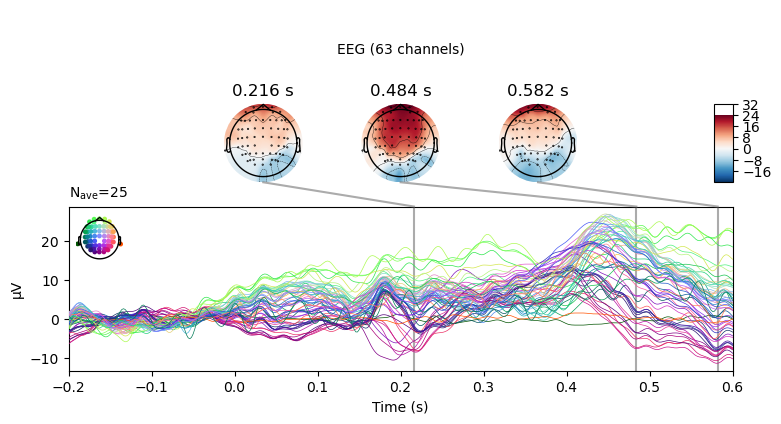

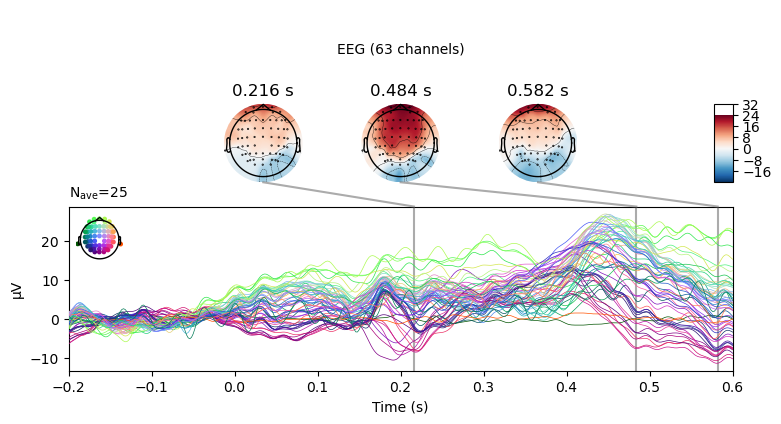

In [77]:
# plot all erps of all channels in standard and target
print("Standard")
erp_standard.plot_joint()

print("Target")
erp_target.plot_joint()

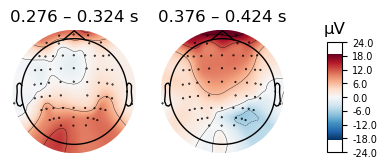

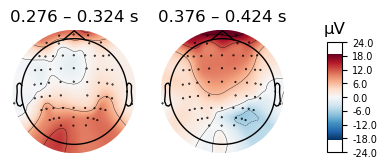

In [78]:
# plot erp topographic maps
erp_standard.plot_topomap(times=[0.3, 0.4], ch_type='eeg', average=0.050) # times is the time points you want to plot the topographic maps at. average is the time window around the time point you want to average the data over (optional).

# Statistical Analysis

In [ ]:

# 6. Statistical Analysis
# ----------------------
# Time window analysis (e.g., for P300)
time_window = (0.250, 0.550)  # 250-550 ms
ch_name = 'Pz'

#### LATENCIES: includes peak and mean latencies ###
# Peak latency: is the time point of the maximum amplitude in a specific time window.
# Fractional Area Latency: is the time point at which a certain percentage of the total area under the curve is reached.

# Define a function to calculate peak latency
def get_peak_latency(erp, time_window, channel):
    """Calculate peak latency in a time window."""
    time_mask = np.logical_and(erp.times >= time_window[0],
                              erp.times <= time_window[1])
    data = erp.data[erp.ch_names.index(channel)]
    peak_index = np.argmax(data[time_mask])
    return erp.times[time_mask][peak_index] * 1000  # Return latency in milliseconds

# Define a function to calculate Fractional Area Latency
def get_fractional_area_latency(erp, time_window, channel, fraction=0.50):
    """Calculate fractional area latency in a time window."""
    time_mask = np.logical_and(erp.times >= time_window[0],
                              erp.times <= time_window[1])
    data = erp.data[erp.ch_names.index(channel)]
    area = np.trapz(data[time_mask], erp.times[time_mask])
    cumulative_area = np.cumsum(data[time_mask]) * (erp.times[1] - erp.times[0])
    target_area = area * fraction
    latency_index = np.where(cumulative_area >= target_area)[0][0]
    return erp.times[time_mask][latency_index] * 1000  # Return latency in milliseconds

### Amplitudes ###
# Peak amplitude: is the maximum amplitude in a specific time window.
# Mean amplitude: is the average amplitude in a specific time window.

# Define a function to calculate peak and mean amplitudes
def get_peak_amplitude(erp, time_window, channel):
    """Calculate peak amplitude in a time window."""
    time_mask = np.logical_and(erp.times >= time_window[0],
                              erp.times <= time_window[1])
    data = erp.data[erp.ch_names.index(channel)]
    return np.max(data[time_mask]) * 1e6  # Convert to µV

def get_mean_amplitude(erp, time_window, channel):
    """Calculate mean amplitude in a time window."""
    time_mask = np.logical_and(erp.times >= time_window[0],
                              erp.times <= time_window[1])
    data = erp.data[erp.ch_names.index(channel)]
    return np.mean(data[time_mask]) * 1e6  # Convert to µV


##### APPLY FUNCTIONS #####

# Calculate peak latencies
p300_std_latency = get_peak_latency(erp_standard, time_window, ch_name)
p300_tgt_latency = get_peak_latency(erp_target, time_window, ch_name)

# Print results
print(f'Peak P300 latency (Standard): {p300_std_latency:.2f} ms')
print(f'Peak P300 latency (Target): {p300_tgt_latency:.2f} ms')

# Calculate mean amplitudes
p300_std_amplitude = get_mean_amplitude(erp_standard, time_window, ch_name)
p300_tgt_amplitude = get_mean_amplitude(erp_target, time_window, ch_name)

# Print results
print(f'Mean P300 amplitude (Standard): {p300_std_amplitude:.2f} µV')
print(f'Mean P300 amplitude (Target): {p300_tgt_amplitude:.2f} µV')

# Statistical comparison (e.g., t-test)
# this is a paired t-test, if you want to do an independent t-test, you can use ttest_ind. 
# This test compares the means of the two conditions (standard and target) at each time point.
from scipy.stats import ttest_rel

t_stat, p_val = ttest_rel(erp_standard.data[erp_standard.ch_names.index(ch_name)],
                            erp_target.data[erp_target.ch_names.index(ch_name)]) 

print(f'T-test results: t = {t_stat:.2f}, p = {p_val:.4f}')


Peak P300 latency (Standard): 250.00 ms
Peak P300 latency (Target): 428.00 ms
Mean P300 amplitude (Standard): 3.50 µV
Mean P300 amplitude (Target): 11.18 µV
T-test results: t = -7.53, p = 0.0000
